In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

Reference: https://python-graph-gallery.com/stacked-and-percent-stacked-barplot

In [2]:
# Read in the data
df = pd.read_csv('Autism-Adult-Data.csv')

In [3]:
df.ASD = df.ASD.map({'YES': 1, 'NO': 0})

In [4]:
scoreList = ['A1_Score','A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

In [5]:
allScores = ['A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
scoreTotal = df.groupby('ASD')['A1_Score'].sum().reset_index()
for col in allScores:
    colTotal = df.groupby('ASD')[col].sum().reset_index()
    scoreTotal = scoreTotal.merge(colTotal)
    
scoreTotal

,ASD,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0,330,185,167,182,173,63,161,299,74,236
1,1,178,134,155,167,178,137,133,158,154,168


In [6]:
scoreTotalEdit = scoreTotal.set_index(scoreList)
scoreTotalEdit

,,,,,,,,,,ASD
A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,
330,185,167,182,173,63,161,299,74,236,0
178,134,155,167,178,137,133,158,154,168,1


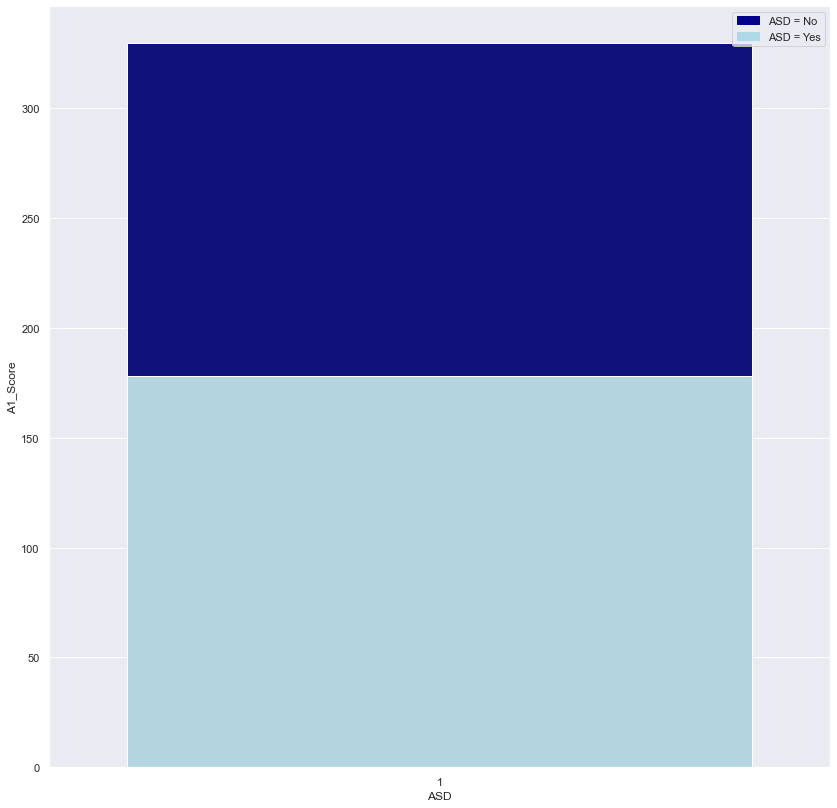

In [7]:
import matplotlib.patches as mpatches

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# set the figure size
plt.figure(figsize=(14, 14))

# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
total = df.groupby('ASD')['A1_Score'].sum().reset_index()

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x='ASD',  y='A1_Score', data=scoreTotal, color='darkblue')

# bottom bar ->  take only smoker=Yes values from the data
asdYes = df[df.ASD== 1]

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x='ASD', y='A1_Score', data=asdYes, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='ASD = No')
bottom_bar = mpatches.Patch(color='lightblue', label='ASD = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

<AxesSubplot:xlabel='A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score'>

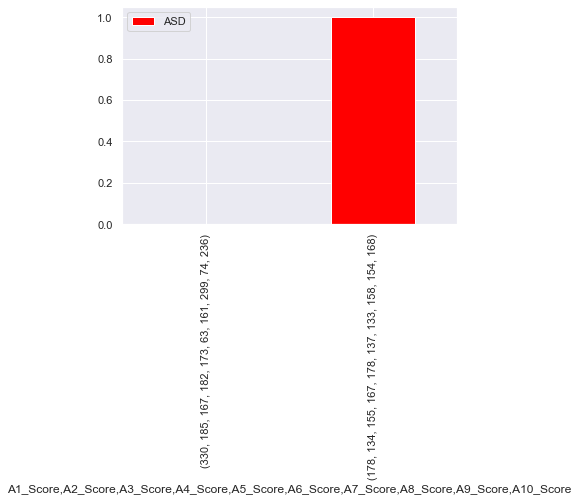

In [8]:
scoreTotalEdit.plot(kind='bar', stacked=True, color=['red', 'skyblue'])